In [1]:
# setup
%load_ext autoreload
%autoreload 2 
%matplotlib inline

# imports
import torch
import numpy as np 
import matplotlib.pyplot as plt 
from pdb import set_trace as st 
import os
from scipy.stats import kurtosis

from initialization.mlp import MLP
from initialization.cnn import CNN
from initialization import stats
plt.rc('text', usetex=False)

# cuda 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# utils 
class Args: pass 
device = 'cuda'

# seed 
torch.manual_seed(0)

/usr/people/kluther/Packages/anaconda3/lib/python3.6/site-packages/scipy/__init__.py:115: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.13.0)
  UserWarning)


In [2]:
def maxnormed_bar(u, **kwargs):
    vs, bs = np.histogram(u, bins=kwargs.get('bins',10))
    vs = vs / vs.max()
    kwargs.pop('bins')
    
    plt.bar(bs[:-1], vs, align='edge', width=bs[1]-bs[0], **kwargs)

def maxnormed_step(u, **kwargs):
    vs, bs = np.histogram(u, bins=kwargs.get('bins',10))
    vs = vs / vs.max()
    kwargs.pop('bins')
    
    plt.step(bs[:-1], vs, where='post', **kwargs)
    

## Nets

In [4]:
w = 1024
t = 1024

In [5]:
layers = {0: [], 4: [], 9: [], 49: []}
L = 50
K = 1024
for k in range(K):
    if k % 20 == 0: print(k)
    X = torch.randn(t, w).cuda() / np.sqrt(2)
    for l in range(L):
        W = torch.randn(w,w).cuda() / np.sqrt(w/2)
        X = X.mm(W)
        
        if l in layers:
            layers[l].append(X[:,0].cpu())
            
        X = X.relu()




0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020


In [8]:
for k,v in layers.items():
    layers[k] = torch.stack(v, dim=0)

/usr/people/kluther/Packages/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


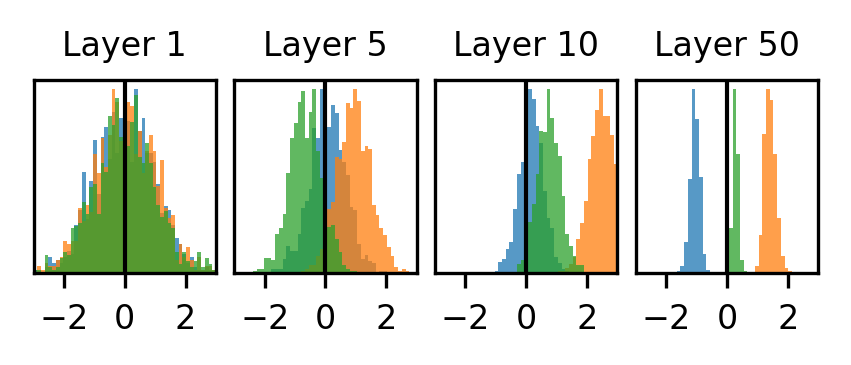

In [11]:
title_fontsize=8
axlabel_fontsize=8
axtick_fontsize=8
legend_fontsize=5

l, u = -3.0, 3.0
d = 1.0

ix = 18
bins = 50
bins = np.linspace(-3.0, 3.0, bins)
color = 'black'
alpha = 0.75

plt.figure(figsize=(3.375,0.85), dpi=300)
#################
# net 1, layer 1
#################
n = 0
ix1 = 0
ix2 = 1
ix3 = 2
a = layers[n]

plt.subplot(1,4,1)
maxnormed_bar(a[ix1,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
maxnormed_bar(a[ix2,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
maxnormed_bar(a[ix3,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
# maxnormed_step(a.cpu().numpy().flatten(), bins=bins, alpha=1.0, linestyle='-', color='red', linewidth=0.5)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)

# labels
plt.title(r'Layer 1', fontsize=title_fontsize)


#################
# net 1, layer 5
#################
n = 4
ix1 = 0
ix2 = 1
ix3 = 4
a = layers[n]

plt.subplot(1,4,2)
maxnormed_bar(a[ix1,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
maxnormed_bar(a[ix2,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
maxnormed_bar(a[ix3,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
# maxnormed_step(a.cpu().numpy().flatten(), bins=bins, alpha=1.0, linestyle='-', color='red', linewidth=0.5)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)


# y axis
plt.gca().set_yticks([])

plt.title('Layer 5', fontsize=axlabel_fontsize)

#################
# net 1, layer 10
#################
n = 9
ix1 = 0
ix2 = 1
ix3 = 2
a = layers[n]

plt.subplot(1,4,3)
maxnormed_bar(a[ix1,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
maxnormed_bar(a[ix2,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
maxnormed_bar(a[ix3,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
# maxnormed_step(a.cpu().numpy().flatten(), bins=bins, alpha=1.0, linestyle='-', color='red', linewidth=0.5)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)

plt.title('Layer 10', fontsize=axlabel_fontsize)

#################
# net 1, layer 50
#################
n = 49
ix1 = 0
ix2 = 3
ix3 = 2
a = layers[n]

plt.subplot(1,4,4)
maxnormed_bar(a[ix1,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
maxnormed_bar(a[ix2,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
maxnormed_bar(a[ix3,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)
# maxnormed_step(a.cpu().numpy().flatten(), bins=bins, alpha=1.0, linestyle='-', color='red', linewidth=0.5)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)

plt.title('Layer 50', fontsize=axlabel_fontsize)
plt.gca().legend(fontsize=legend_fontsize, bbox_to_anchor=(.70, 1.10), loc='upper left', framealpha=1.0)


# plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.savefig('sample_randomness.pdf')

plt.show()
    

/usr/people/kluther/Packages/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


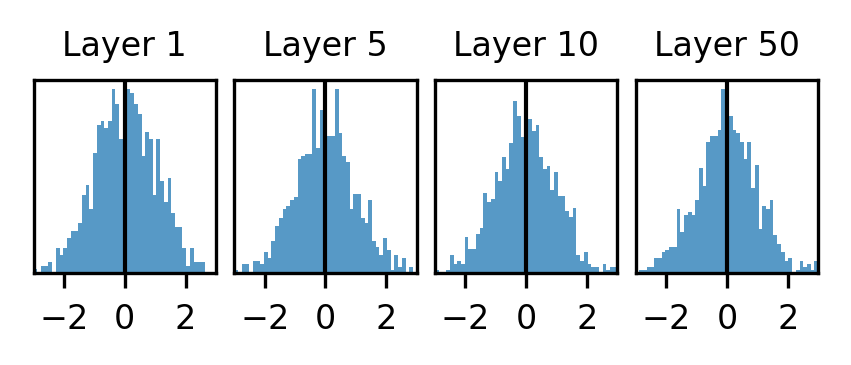

In [13]:
title_fontsize=8
axlabel_fontsize=8
axtick_fontsize=8
legend_fontsize=5

l, u = -3.0, 3.0
d = 1.0

ix = 18
bins = 50
bins = np.linspace(-3.0, 3.0, bins)
color = 'black'
alpha = 0.75

plt.figure(figsize=(3.375,0.85), dpi=300)
#################
# net 1, layer 1
#################
n = 0
ix1 = 0
ix2 = 1
ix3 = 2
a = layers[n]

plt.subplot(1,4,1)
maxnormed_bar(a[:,ix1].cpu().numpy(), bins=bins, alpha=alpha, color=None)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)

# labels
plt.title(r'Layer 1', fontsize=title_fontsize)


#################
# net 1, layer 5
#################
n = 4
ix1 = 0
ix2 = 1
ix3 = 4
a = layers[n]

plt.subplot(1,4,2)
maxnormed_bar(a[:,ix1].cpu().numpy(), bins=bins, alpha=alpha, color=None)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)


# y axis
plt.gca().set_yticks([])

plt.title('Layer 5', fontsize=axlabel_fontsize)

#################
# net 1, layer 10
#################
n = 9
ix1 = 0
ix2 = 1
ix3 = 2
a = layers[n]

plt.subplot(1,4,3)
maxnormed_bar(a[:,ix1].cpu().numpy(), bins=bins, alpha=alpha, color=None)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)

plt.title('Layer 10', fontsize=axlabel_fontsize)

#################
# net 1, layer 50
#################
n = 49
ix1 = 0
ix2 = 3
ix3 = 2
a = layers[n]

plt.subplot(1,4,4)
maxnormed_bar(a[:,ix1].cpu().numpy(), bins=bins, alpha=alpha, color=None)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)

plt.title('Layer 50', fontsize=axlabel_fontsize)
plt.gca().legend(fontsize=legend_fontsize, bbox_to_anchor=(.70, 1.10), loc='upper left', framealpha=1.0)


# plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.savefig('network_randomness.pdf')


plt.show()
    

In [17]:
layers_l = {0: [], 4: [], 9: [], 49: []}
L = 50
X = torch.randn(t, w).cuda() / np.sqrt(2)
for l in range(L):
    W = torch.randn(w,w).cuda() / np.sqrt(w/2)
    X = X.mm(W)

    if l in layers:
        layers_l[l] = X.cpu()

    X = X.relu()




/usr/people/kluther/Packages/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


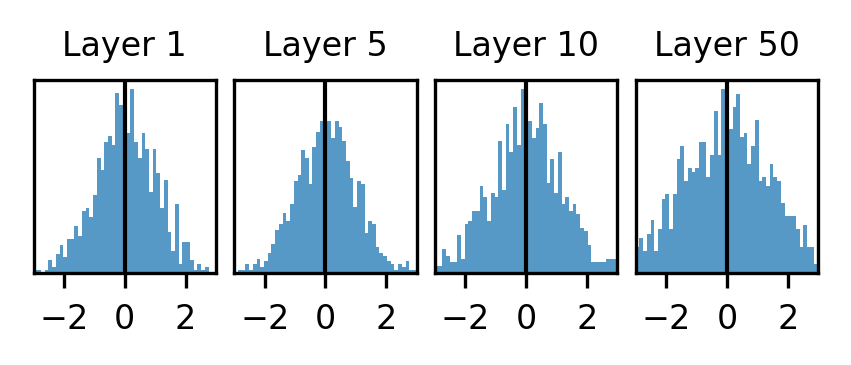

In [19]:
title_fontsize=8
axlabel_fontsize=8
axtick_fontsize=8
legend_fontsize=5

l, u = -3.0, 3.0
d = 1.0

ix = 18
bins = 50
bins = np.linspace(-3.0, 3.0, bins)
color = 'black'
alpha = 0.75

plt.figure(figsize=(3.375,0.85), dpi=300)
#################
# net 1, layer 1
#################
n = 0
ix1 = 0
ix2 = 1
ix3 = 2
a = layers_l[n]

plt.subplot(1,4,1)
maxnormed_bar(a[ix1,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)

# labels
plt.title(r'Layer 1', fontsize=title_fontsize)


#################
# net 1, layer 5
#################
n = 4
ix1 = 0
ix2 = 1
ix3 = 4
a = layers_l[n]

plt.subplot(1,4,2)
maxnormed_bar(a[ix1,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)


# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)


# y axis
plt.gca().set_yticks([])

plt.title('Layer 5', fontsize=axlabel_fontsize)

#################
# net 1, layer 10
#################
n = 9
ix1 = 0
ix2 = 1
ix3 = 2
a = layers_l[n]

plt.subplot(1,4,3)
maxnormed_bar(a[ix1,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)

plt.title('Layer 10', fontsize=axlabel_fontsize)

#################
# net 1, layer 50
#################
n = 49
ix1 = 0
ix2 = 3
ix3 = 2
a = layers_l[n]

plt.subplot(1,4,4)
maxnormed_bar(a[ix1,:].cpu().numpy(), bins=bins, alpha=alpha, color=None)

# x axis
plt.axvline(0.0, color=color,linewidth=1.0)
plt.xlim(l, u)
plt.xticks(np.linspace(l+d, u-d, 3), fontsize=axtick_fontsize)

# y axis
plt.gca().set_yticks([])
# plt.ylabel('Kaiming', fontsize=axlabel_fontsize)

plt.title('Layer 50', fontsize=axlabel_fontsize)
plt.gca().legend(fontsize=legend_fontsize, bbox_to_anchor=(.70, 1.10), loc='upper left', framealpha=1.0)


# plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.savefig('layer_randomness.pdf')


plt.show()
    